## SED stats & plots

- Read SYNAGE++ results
- Plot SED and models


**Input flux tables**:

```
~/Projects/MFS/FornaxA/contData/ToT/ToTFluxes.tbl'
~/Projects/MFS/FornaxA/contData/ELobe/ELobeFluxes.tbl'
~/Projects/MFS/FornaxA/contData/WLobe/WLobeFluxes.tbl'
~/Projects/MFS/FornaxA/contData/Core/CoreFluxes.tbl'
```
**Input SYNAGE tables (in synOut directory)**:

```
ToTCI_point1_fit.dat
ToTCIOFF_point1_fit.dat
ToTCI.stats
ToTCIOFF.stats

ELobeCI_point1_fit.dat
ELobeCIOFF_point1_fit.dat
ELobeCI.stats
ELobeCIOFF.stats

WLobeCI_point1_fit.dat
WLobeCIOFF_point1_fit.dat
WLobeCI.stats
WLobeCIOFF.stats

```


In [14]:
import numpy as np
import shutil
from astropy.io import ascii, fits
import fluxInt
import pbCorr
import synCl
from prettytable import PrettyTable


fint = fluxInt.flInt()
pb = pbCorr.pbcorr()
syn = synCl.synClean()

#rootDir = '/home/maccagni/Projects/MFS/FornaxA/contData/'
rootDir = '/Users/maccagni/Projects/MFS/FornaxA/contData/'

figDir = rootDir+'sedFigs/'


aut = 'FgInd'
coreAut = 'Pbcorr'

names = ['ToT'+aut,'ELobe'+aut,'WLobe'+aut,'coreBeam'+coreAut,'coreOut'+coreAut]


inTabs = rootDir+'inTabs/'

ToTDir = rootDir+'ToT/'
ELobeDir = rootDir+'ELobe/'
WLobeDir = rootDir+'WLobe/'
CoreDir = rootDir+'core/'
#CoreDir = rootDir+'kore/'

dirNames = [ToTDir,ELobeDir,WLobeDir,CoreDir,CoreDir]

fint.rootdir = rootDir
syn.rootdir = rootDir
pb.rootdir = rootDir

print '''\t+---------+\n\t Inputs loaded\n\t+---------+'''


	+---------+
	 Inputs loaded
	+---------+


In [15]:

for i in xrange(0,len(names)):
    print names[i]
    statsCI = syn.readCIStats(dirNames[i]+'synOut/'+names[i]+'CI.stats')
    statsCIOFF =  syn.readCIOFFStats(dirNames[i]+'synOut/'+names[i]+'CIOFF.stats')
    if i <3:
        statsJP = syn.readCIStats(dirNames[i]+'synOut/'+names[i]+'JP.stats')
        statsPW = syn.readCIStats(dirNames[i]+'synOut/'+names[i]+'PW.stats')
  
    #flArr= ascii.read(rootDir+names[i]+'/'+names[i]+'Fluxes.tbl', fast_reader=False)
    #modCI = syn.readCIMod(rootDir+names[i]+'/'+names[i]+'CI_point1_fit.dat')
    #modCIOFF = syn.readCIMod(rootDir+names[i]+'/'+names[i]+'CIOFFCore_point1_fit.dat')

    print '''\t+---------+\n\t'''+names[i]+'''\n\t+---------+'''
    
    CI = PrettyTable(['CI', 'value'])
    for key, val in statsCI.items():
        CI.add_row([key, val])


    CIOFF = PrettyTable(['CIOFF', 'value'])
    for key, val in statsCIOFF.items():
        CIOFF.add_row([key, val])

    JP = PrettyTable(['JP', 'value'])
    for key, val in statsJP.items():
        JP.add_row([key, val])
        
    PW = PrettyTable(['PW', 'value'])
    for key, val in statsPW.items():
        PW.add_row([key, val])
        
    print CI, CIOFF, JP, PW

    if i == 0:
        TotStatsCI = statsCI.copy()
        TotStatsCIOFF = statsCIOFF.copy()
        TotStatsJP = statsJP.copy()

    elif i ==1:
        ELobeStatsCI = statsCI.copy()
        ELobeStatsCIOFF = statsCIOFF.copy()    
        ELobeStatsJP = statsJP.copy()

    elif i == 2:
        WLobeStatsCI = statsCI.copy()
        WLobeStatsCIOFF = statsCIOFF.copy()
        WLobeStatsJP = statsJP.copy()
    elif i ==3:
        CoreStatsCI = statsCI.copy()
        CoreStatsCIOFF = statsCIOFF.copy()
    elif i ==4:
        OutStatsCI = statsCI.copy()
        OutStatsCIOFF = statsCIOFF.copy() 
        
print '''\t+---------+\n\t Synage results read\n\t+---------+'''


ToTFgInd
	+---------+
	ToTFgInd
	+---------+
+--------------+-------------+
|      CI      |    value    |
+--------------+-------------+
| alpha_errsup |  0.03480163 |
|    break     |   8991.108  |
|    chisq     |   38.60857  |
|    chired    |   2.144921  |
|  break_inf   |  -3518.777  |
|    alpha     |  0.6078793  |
|     ndf      |     18.0    |
| alpha_errinf | -0.04437293 |
|     norm     |   38.24975  |
|  break_sup   |   1213.289  |
+--------------+-------------+ +--------------+-------------+
|    CIOFF     |    value    |
+--------------+-------------+
|   t_errinf   |  -0.5057656 |
|    tratio    |  0.6650207  |
|   t_errsup   |   0.180765  |
|    break     |   39717.53  |
|    chisq     |   5.898878  |
|    alpha     |  0.6135865  |
| alpha_errinf | -0.07119696 |
| alpha_errsup |  0.02971973 |
|    chired    |  0.3469928  |
|     ndf      |     17.0    |
|  break_inf   |  -31320.16  |
|  break_sup   |   8882.516  |
|     norm     |   14.28243  |
+--------------+---------

In [16]:
#-------------------------------------------------#
# Plot SED
#-------------------------------------------------#
from matplotlib import pyplot as plt
from matplotlib import rc
from matplotlib import gridspec
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, LogLocator
from matplotlib import transforms as mtransforms

def plot_CI_over_CIOFF(tot,mod_CI,mod_CIOFF,mod_JP,mod_PW,statsCI,statsCIOFF,statsJP,labe,color_plot,sed):

    params = {'font.family'         :' serif',
              'font.style'          : 'normal',
              'font.weight'         : 'book',
              'font.size'           : 30.0,
              'axes.linewidth'      : 3,
              'lines.linewidth'     : 3,
              'xtick.labelsize'     : 26,
              'ytick.labelsize'     : 26, 
              'xtick.direction'     :'in',
              'ytick.direction'     :'in',
              'xtick.top'           : True,   # draw ticks on the top side
              'xtick.bottom'        : True,   # draw ticks on the bottom side    
              'ytick.left'          : True,   # draw ticks on the top side
              'ytick.right'         : True,   # draw ticks on the bottom side  
              'xtick.major.size'    : 8,
              'xtick.major.width'   : 3,
              'xtick.minor.size'    : 4,
              'xtick.minor.width'   : 2,
              'ytick.major.size'    : 8,
              'ytick.major.width'   : 3,
              'ytick.minor.size'    : 4,
              'ytick.minor.width'   : 2, 
              'text.usetex'         : True,
              'text.latex.unicode'  : True
               }
    plt.rcParams.update(params)

    # initialize figure
    fig = plt.figure(figsize =(12,12))
    fig.subplots_adjust(hspace=0.0)
    gs = gridspec.GridSpec(1, 1)
    plt.rc('xtick')


    # Initialize subplots
    ax1 = fig.add_subplot(gs[0])
    ax1.set_xlabel(r'Frequency [MHz]')
    ax1.set_ylabel(r'Flux density [Jy]')
    #ax1.set_xscale("symlog", nonposx='clip', linthreshy=0.1)
    #ax1.set_yscale("symlog", nonposy='clip', linthreshy=0.1)
    ax1.set_xscale("log", nonposx='clip')
    ax1.set_yscale("log", nonposy='clip')
    ax1.set_ylim([1e-3,2e3])
    ax1.set_xlim([50,5e5])
    ax1.tick_params(axis='both', which='both', pad=5)
    ax1.xaxis.set_minor_locator(LogLocator(base=10,subs=[2.0,4.0,6.0,8.0]))
    ax1.yaxis.set_minor_locator(LogLocator(base=10,subs=[2.0,4.0,6.0,8.0]))
    
    # MODELS
    
    idx_max = (np.abs(mod_CI[0] - 5e5)).argmin()
    idx_min = (np.abs(mod_CI[0] - 30)).argmin()
    totplot = ax1.errorbar(tot['Frequency [MHz]'],tot['Integrated Flux [Jy]'], yerr=tot['Error [Jy]'],
             marker='o', color=color_plot[0], linestyle=' ',label=labe,capsize=6) 
    
    ax1.plot(mod_CI[0][idx_min:idx_max],mod_CI[1][idx_min:idx_max],lw=3, marker=' ', 
             color=color_plot[1], linestyle=':',label='CI',alpha=0.5)

    ax1.axvline(statsCI['break'],ymin=0,ymax=0.58,ls=':',c=color_plot[1],lw=2,alpha=0.5)

    ax1.plot(mod_CIOFF[0][idx_min:idx_max],mod_CIOFF[1][idx_min:idx_max],lw=3, marker=' ', 
             color=color_plot[2], linestyle='--',label=r'CI$_{\rm OFF}$',alpha=0.5)

    ax1.axvline(statsCIOFF['break'],ymin=0,ymax=0.55,ls='--',c=color_plot[2],lw=2,alpha=0.5)
    
    #ax1.plot(mod_JP[0][idx_min:idx_max],mod_JP[1][idx_min:idx_max],lw=3, marker=' ', 
    #         color=color_plot[2], linestyle='-.',label=r'JP',alpha=0.5)

    #idx_br = (np.abs(mod_JP[0] - float(statsJP['break']))).argmin()
    #ax1.axvline(statsJP['break'],ymin=0,ymax=0.55,ls='-.',c=color_plot[2],lw=2,alpha=0.5)
    
    #ax1.plot(mod_PW[0][idx_min:idx_max],mod_PW[1][idx_min:idx_max],lw=3, marker=' ', 
    #         color=color_plot[2], linestyle='-',label=r'PW',alpha=0.5)
    
    totplot[-1][0].set_linestyle('--')
    totplot[-1][0].set_linewidth(3)    
    #ax1.axvline(br_f_no217,ymin=0,ymax=0.73,ls='-.',c='cyan',lw=1) 

    legend = plt.legend(loc=1, prop={'size': 20})
    legend.get_frame().set_edgecolor('black')

    # Save figure to file
    plt.savefig(sed,overwrite = True)


print '\n\t-----> Loaded <-----'


	-----> Loaded <-----


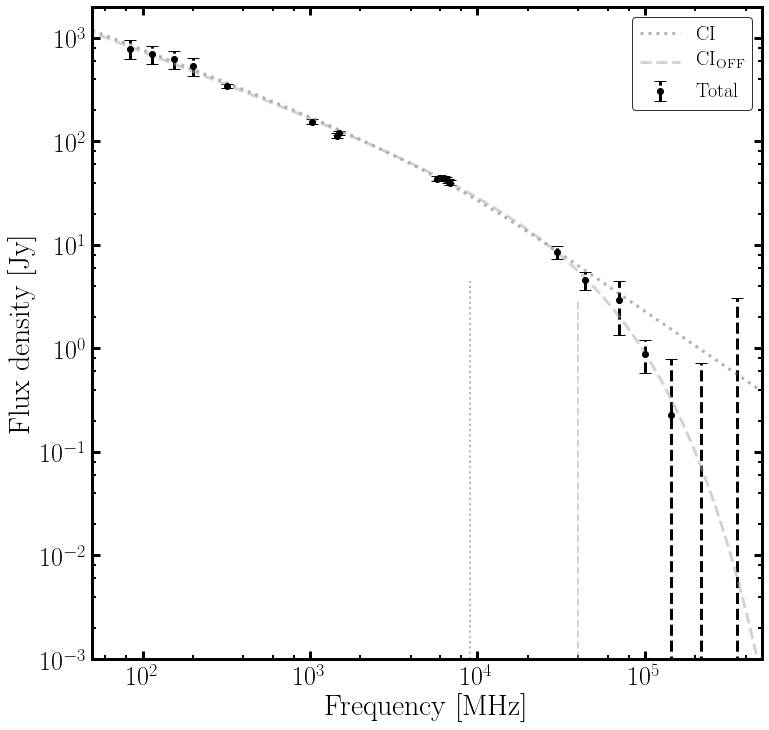

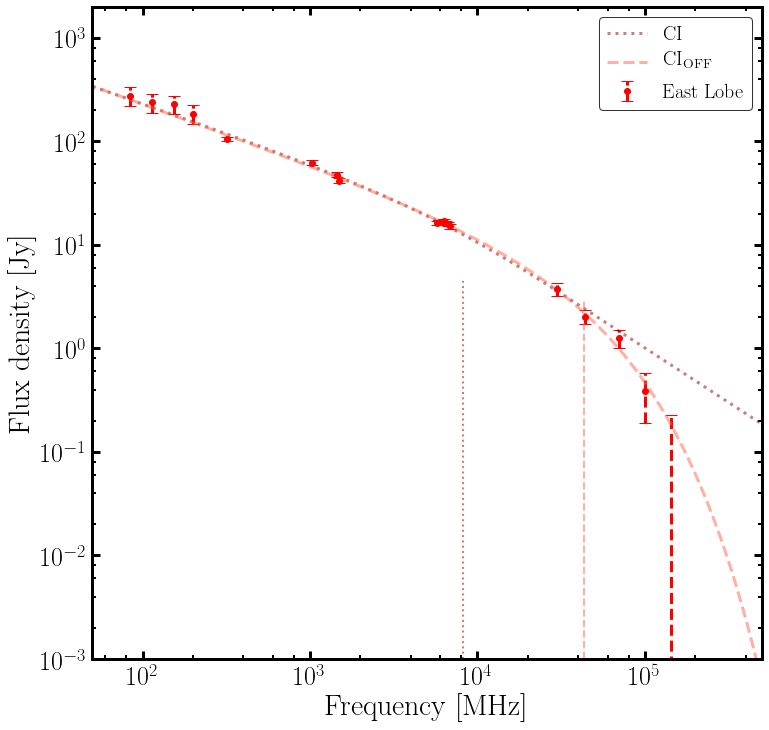

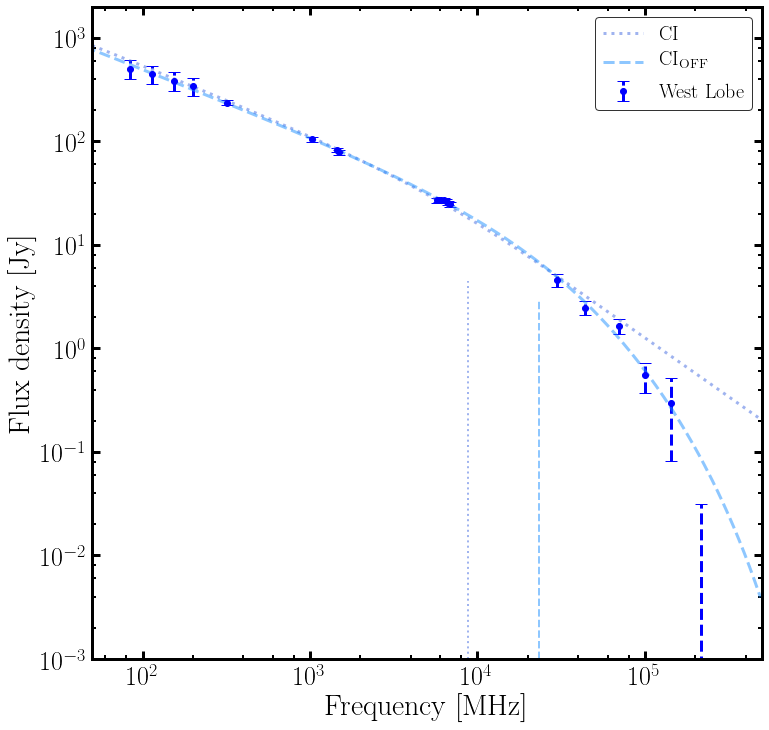

In [17]:
ToT= ascii.read(ToTDir+'ToTFluxes'+aut+'.tbl', fast_reader=False)
TotModCI = syn.readCIMod(ToTDir+'synOut/ToT'+aut+'CI_point1_fit.dat')
TotModCIOFF = syn.readCIMod(ToTDir+'synOut/ToT'+aut+'CIOFF_point1_fit.dat')
TotModJP = syn.readCIMod(ToTDir+'synOut/ToT'+aut+'JP_point1_fit.dat')
TotModPW = syn.readCIMod(ToTDir+'synOut/ToT'+aut+'PW_point1_fit.dat')


ELobe= ascii.read(ELobeDir+'ELFluxes'+aut+'.tbl', fast_reader=False)
ELobeModCI = syn.readCIMod(ELobeDir+'synOut/ELobe'+aut+'CI_point1_fit.dat')
ELobeModCIOFF = syn.readCIMod(ELobeDir+'synOut/ELobe'+aut+'CIOFF_point1_fit.dat')
ELobeModJP = syn.readCIMod(ELobeDir+'synOut/ELobe'+aut+'JP_point1_fit.dat')
ELobeModPW = syn.readCIMod(ELobeDir+'synOut/ELobe'+aut+'PW_point1_fit.dat')


WLobe= ascii.read(WLobeDir+'WLFluxes'+aut+'.tbl', fast_reader=False)
WLobeModCI = syn.readCIMod(WLobeDir+'synOut/WLobe'+aut+'CI_point1_fit.dat')
WLobeModCIOFF = syn.readCIMod(WLobeDir+'synOut/WLobe'+aut+'CIOFF_point1_fit.dat')
WLobeModJP = syn.readCIMod(WLobeDir+'synOut/WLobe'+aut+'JP_point1_fit.dat')
WLobeModPW = syn.readCIMod(WLobeDir+'synOut/WLobe'+aut+'PW_point1_fit.dat')


Core= ascii.read(CoreDir+'outTabs/coreFluxBeam'+coreAut+'.tbl', fast_reader=False)
CoreModCI = syn.readCIMod(CoreDir+'synOut/coreBeam'+coreAut+'CI_point1_fit.dat')
CoreModCIOFF = syn.readCIMod(CoreDir+'synOut/coreBeam'+coreAut+'CIOFF_point1_fit.dat')

Out= ascii.read(CoreDir+'outTabs/coreFluxOut'+coreAut+'.tbl', fast_reader=False)
OutModCI = syn.readCIMod(CoreDir+'synOut/coreOut'+coreAut+'CI_point1_fit.dat')
OutModCIOFF = syn.readCIMod(CoreDir+'synOut/coreOut'+coreAut+'CIOFF_point1_fit.dat')

outplot=figDir+'ToT_CICIOFF_JPPW'+aut+'.png'
plot_CI_over_CIOFF(ToT,TotModCI,TotModCIOFF,TotModJP,TotModPW,TotStatsCI,TotStatsCIOFF,TotStatsJP,'Total',['black','dimgrey','darkgrey'],outplot)

outplot=figDir+'ELobe_CICIOFF_JPPW'+aut+'.png'
plot_CI_over_CIOFF(ELobe,ELobeModCI,ELobeModCIOFF,ELobeModJP,ELobeModPW,ELobeStatsCI,ELobeStatsCIOFF,ELobeStatsJP,'East Lobe',['red','darkred','tomato'],outplot)

outplot=figDir+'WLobe_CICIOFF_JPPW'+aut+'.png'
plot_CI_over_CIOFF(WLobe,WLobeModCI,WLobeModCIOFF,WLobeModJP,WLobeModPW,WLobeStatsCI,WLobeStatsCIOFF,WLobeStatsJP,'West Lobe',['blue','royalblue','dodgerblue'],outplot)

#outplot=figDir+'Core_CICIOFF'+aut+'.png'
#plot_CI_over_CIOFF(Core,CoreModCI,CoreModCIOFF,CoreStatsCI,CoreStatsCIOFF,'Core',['green','darkgreen','mediumseagreen'],outplot)


In [18]:
def plot_SED(ToT,ELobe,WLobe,Core,sed):

    params = {'font.family'         :' serif',
              'font.style'          : 'normal',
              'font.weight'         : 'book',
              'font.size'           : 30.0,
              'axes.linewidth'      : 3,
              'lines.linewidth'     : 3,
              'xtick.labelsize'     : 26,
              'ytick.labelsize'     : 26, 
              'xtick.direction'     :'in',
              'ytick.direction'     :'in',
              'xtick.top'           : True,   # draw ticks on the top side
              'xtick.bottom'        : True,   # draw ticks on the bottom side    
              'ytick.left'          : True,   # draw ticks on the top side
              'ytick.right'         : True,   # draw ticks on the bottom side  
              'xtick.major.size'    : 8,
              'xtick.major.width'   : 3,
              'xtick.minor.size'    : 4,
              'xtick.minor.width'   : 2,
              'ytick.major.size'    : 8,
              'ytick.major.width'   : 3,
              'ytick.minor.size'    : 4,
              'ytick.minor.width'   : 2, 
              'text.usetex'         : True,
              'text.latex.unicode'  : True
               }
    plt.rcParams.update(params)

    # initialize figure
    fig = plt.figure(figsize =(12,12))
    fig.subplots_adjust(hspace=0.0)
    gs = gridspec.GridSpec(1, 1)
    plt.rc('xtick')


    # Initialize subplots
    ax1 = fig.add_subplot(gs[0])
    ax1.set_xlabel(r'Frequency [MHz]')
    ax1.set_ylabel(r'Flux density [Jy]')
    #ax1.set_xscale("symlog", nonposx='clip', linthreshy=0.1)
    #ax1.set_yscale("symlog", nonposy='clip', linthreshy=0.1)
    ax1.set_xscale("log", nonposx='clip')
    ax1.set_yscale("log", nonposy='clip')
    ax1.set_ylim([1e-3,2e3])
    ax1.set_xlim([50,5e5])
    ax1.tick_params(axis='both', which='major', pad=5)
    ax1.xaxis.set_minor_locator(LogLocator(base=10,subs=[2.0,4.0,6.0,8.0]))
    ax1.yaxis.set_minor_locator(LogLocator(base=10,subs=[2.0,4.0,6.0,8.0]))      
    # MODELS
    
    TotPlot = ax1.errorbar(ToT['Frequency [MHz]'],ToT['Integrated Flux [Jy]'], yerr=ToT['Error [Jy]'],
             marker='o', color='black', linestyle=' ',label='Total',capsize=6,markersize=10,) 
    TotPlot[-1][0].set_linestyle('--')
    TotPlot[-1][0].set_linewidth(3)
    
    ELobePlot = ax1.errorbar(ELobe['Frequency [MHz]'],ELobe['Integrated Flux [Jy]'], yerr=ELobe['Error [Jy]'],
             marker='o', color='red', linestyle=' ',label='East Lobe',capsize=6,markersize=10) 
    ELobePlot[-1][0].set_linestyle('--')
    ELobePlot[-1][0].set_linewidth(3)
    
    WLobePlot = ax1.errorbar(WLobe['Frequency [MHz]'],WLobe['Integrated Flux [Jy]'], yerr=WLobe['Error [Jy]'],
             marker='o', color='blue', linestyle=' ',label='West Lobe',capsize=6,markersize=10) 
    WLobePlot[-1][0].set_linestyle('--')
    WLobePlot[-1][0].set_linewidth(3)
    
    #CorePlot = ax1.errorbar(Core['Frequency [MHz]'],Core['Integrated Flux [Jy]'], yerr=Core['Error [Jy]'],
     #$        marker='o', color='green', linestyle=' ',label='Core',capsize=6) 
    #CorePlot[-1][0].set_linestyle('--')
    #CorePlot[-1][0].set_linewidth(3)



    #totplot[-1][0].set_linestyle('--')
    #totplot[-1][0].set_linewidth(3)    
    #ax1.axvline(br_f_no217,ymin=0,ymax=0.73,ls='-.',c='cyan',lw=1) 

    legend = plt.legend(loc=1, prop={'size': 30})
    legend.get_frame().set_edgecolor('black')

    # Save figure to file
    plt.savefig(sed,overwrite = True)

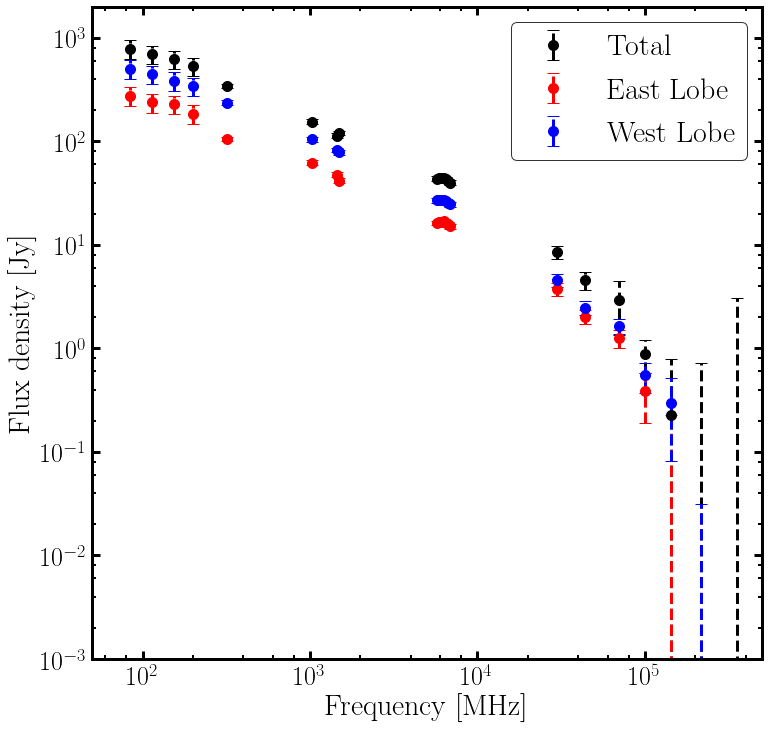

In [19]:
ToT= ascii.read(ToTDir+'ToTFluxes'+aut+'.tbl', fast_reader=False)
ELobe= ascii.read(ELobeDir+'ELFluxes'+aut+'.tbl', fast_reader=False)
WLobe= ascii.read(WLobeDir+'WLFluxes'+aut+'.tbl', fast_reader=False)
Core= ascii.read(CoreDir+'outTabs/coreFluxBeam'+coreAut+'.tbl', fast_reader=False)


outplot=figDir+'SED_Alltmp'+aut+'.png'
plot_SED(ToT,ELobe,WLobe,Core,outplot)

In [20]:
#-------------------------------------------------#
# Plot SED
#-------------------------------------------------#

def plotAllOver(tot1,mod1,stats1,tot2,mod2,stats2,tot3,mod3,stats3,tot4,mod4,stats4,sed):

    params = {'font.family'         :' serif',
              'font.style'          : 'normal',
              'font.weight'         : 'book',
              'font.size'           : 30.0,
              'axes.linewidth'      : 3,
              'lines.linewidth'     : 3,
              'xtick.labelsize'     : 26,
              'ytick.labelsize'     : 26, 
              'xtick.direction'     :'in',
              'ytick.direction'     :'in',
              'xtick.top'           : True,   # draw ticks on the top side
              'xtick.bottom'        : True,   # draw ticks on the bottom side    
              'ytick.left'          : True,   # draw ticks on the top side
              'ytick.right'         : True,   # draw ticks on the bottom side  
              'xtick.major.size'    : 8,
              'xtick.major.width'   : 3,
              'xtick.minor.size'    : 4,
              'xtick.minor.width'   : 2,
              'ytick.major.size'    : 8,
              'ytick.major.width'   : 3,
              'ytick.minor.size'    : 4,
              'ytick.minor.width'   : 2, 
              'text.usetex'         : True,
              'text.latex.unicode'  : True
               }
    plt.rcParams.update(params)

    # initialize figure
    fig = plt.figure(figsize =(12,12))
    fig.subplots_adjust(hspace=0.0)
    gs = gridspec.GridSpec(1, 1)
    plt.rc('xtick')


    # Initialize subplots
    ax1 = fig.add_subplot(gs[0])
    ax1.set_xlabel(r'Frequency [MHz]')
    ax1.set_ylabel(r'Flux density [Jy]')
    #ax1.set_xscale("symlog", nonposx='clip', linthreshy=0.1)
    #ax1.set_yscale("symlog", nonposy='clip', linthreshy=0.1)
    ax1.set_xscale("log", nonposx='clip')
    ax1.set_yscale("log", nonposy='clip')
    ax1.set_ylim([1e-3,2e3])
    ax1.set_xlim([50,5e5])
    ax1.tick_params(axis='both', which='major', pad=5)
    ax1.xaxis.set_minor_locator(LogLocator(base=10,subs=[2.0,4.0,6.0,8.0]))
    ax1.yaxis.set_minor_locator(LogLocator(base=10,subs=[2.0,4.0,6.0,8.0]))      
    # MODELS
    
    idx_max = (np.abs(mod1[0] - 5e5)).argmin()
    idx_min = (np.abs(mod1[0] - 30)).argmin()
    
    totplot1 = ax1.errorbar(tot1['Frequency [MHz]'],tot1['Integrated Flux [Jy]'], yerr=tot1['Error [Jy]'],
             marker='o', color='red', linestyle=' ',label='East Lobe',capsize=6,markersize=10) 
    
    ax1.plot(mod1[0][idx_min:idx_max],mod1[1][idx_min:idx_max],lw=3, marker=' ', 
             color='red', linestyle=':',label='',alpha=0.5)

    idx_br = (np.abs(mod1[0] - float(stats1['break']))).argmin()
    #ax1.axvline(stats1['break'],ymin=0,ymax=0.58,ls=':',c='red',lw=3,alpha=0.8)
    
    totplot1[-1][0].set_linestyle('--')
    totplot1[-1][0].set_linewidth(3)    
    
    totplot2 = ax1.errorbar(tot2['Frequency [MHz]'],tot2['Integrated Flux [Jy]'], yerr=tot2['Error [Jy]'],
             marker='o', color='blue', linestyle=' ',label='West Lobe',capsize=6,markersize=10) 
    
    idx_max = (np.abs(mod2[0] - 5e5)).argmin()
    idx_min = (np.abs(mod2[0] - 30)).argmin()    
    ax1.plot(mod2[0][idx_min:idx_max],mod2[1][idx_min:idx_max],lw=3, marker=' ', 
             color='blue', linestyle=':',label='',alpha=0.5)

    idx_br = (np.abs(mod2[0] - float(stats2['break']))).argmin()
    #ax1.axvline(stats2['break'],ymin=0,ymax=0.58,ls=':',c='blue',lw=3,alpha=0.8)
    
    totplot2[-1][0].set_linestyle('--')
    totplot2[-1][0].set_linewidth(3)      
    
    totplot3 = ax1.errorbar(tot3['Frequency [MHz]'],tot3['Integrated Flux [Jy]'], yerr=tot3['Error [Jy]'],
             marker='o', color='green', linestyle=' ',label='Core',capsize=6,markersize=10) 
    
    idx_max = (np.abs(mod3[0] - 5e5)).argmin()
    idx_min = (np.abs(mod3[0] - 10)).argmin()    
    ax1.plot(mod3[0][idx_min:idx_max],mod3[1][idx_min:idx_max],lw=3, marker=' ', 
            color='green', linestyle=':',label='',alpha=0.5)

    idx_br = (np.abs(mod3[0] - float(stats3['break']))).argmin()
    #ax1.axvline(stats3['break'],ymin=0,ymax=0.58,ls=':',c='green',lw=3,alpha=0.8)
    
    totplot3[-1][0].set_linestyle('--')
    totplot3[-1][0].set_linewidth(3) 
    
    idx_max = (np.abs(mod4[0] - 5e5)).argmin()
    idx_min = (np.abs(mod4[0] - 10)).argmin()    
   
    totplot4 = ax1.errorbar(tot4['Frequency [MHz]'],tot4['Integrated Flux [Jy]'], yerr=tot4['Error [Jy]'],
             marker='o', color='m', linestyle=' ',label='Jets',capsize=6,markersize=10) 
    
    ax1.plot(mod4[0][idx_min:idx_max],mod4[1][idx_min:idx_max],lw=3, marker=' ', 
            color='m', linestyle=':',label='',alpha=0.5)

    idx_br = (np.abs(mod4[0] - float(stats4['break']))).argmin()
    #ax1.axvline(stats4['break'],ymin=0,ymax=0.58,ls=':',c='m',lw=3,alpha=0.8)
    
    totplot4[-1][0].set_linestyle('--')
    totplot4[-1][0].set_linewidth(3) 
    
    #ax1.axvline(br_f_no217,ymin=0,ymax=0.73,ls='-.',c='cyan',lw=1) 

    legend = plt.legend(loc=1, prop={'size': 20})
    legend.get_frame().set_edgecolor('black')

    # Save figure to file
    plt.savefig(sed,overwrite = True)


print '\n\t-----> Loaded <-----'


	-----> Loaded <-----


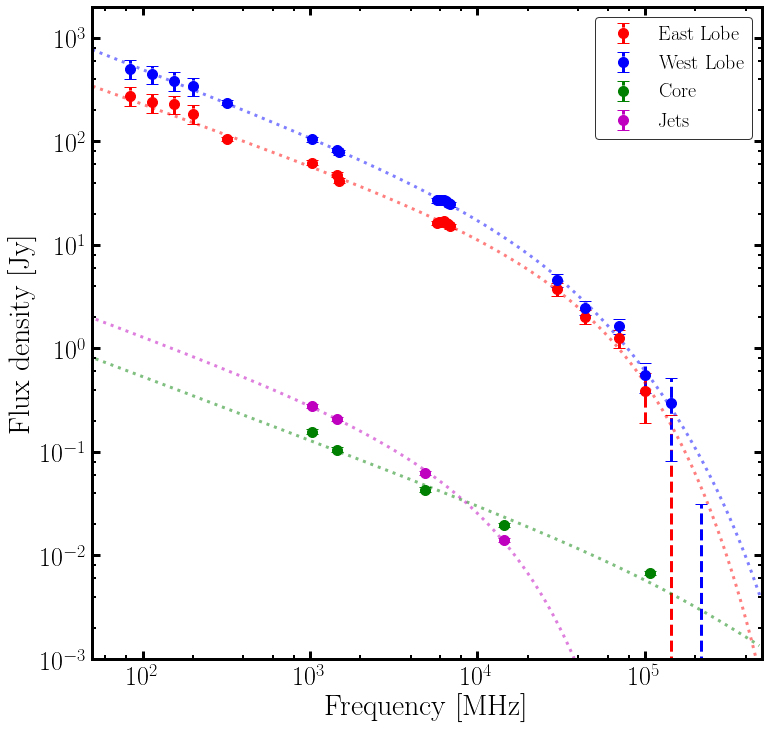

In [21]:
outplot=figDir+'ModAll'+aut+'PbCorr.png'
plotAllOver(ELobe,ELobeModCIOFF,ELobeStatsCIOFF,WLobe,WLobeModCIOFF,WLobeStatsCIOFF,
         Core,CoreModCI,CoreStatsCI,Out,OutModCIOFF,OutStatsCIOFF,outplot)

In [22]:
def plot_SED_over(ELobe,WLobe,ELobecv,WLobecv,sed):

    params = {'font.family'         :' serif',
              'font.style'          : 'normal',
              'font.weight'         : 'book',
              'font.size'           : 30.0,
              'axes.linewidth'      : 3,
              'lines.linewidth'     : 3,
              'xtick.labelsize'     : 26,
              'ytick.labelsize'     : 26, 
              'xtick.direction'     :'in',
              'ytick.direction'     :'in',
              'xtick.top'           : True,   # draw ticks on the top side
              'xtick.bottom'        : True,   # draw ticks on the bottom side    
              'ytick.left'          : True,   # draw ticks on the top side
              'ytick.right'         : True,   # draw ticks on the bottom side  
              'xtick.major.size'    : 8,
              'xtick.major.width'   : 3,
              'xtick.minor.size'    : 4,
              'xtick.minor.width'   : 2,
              'ytick.major.size'    : 8,
              'ytick.major.width'   : 3,
              'ytick.minor.size'    : 4,
              'ytick.minor.width'   : 2, 
              'text.usetex'         : True,
              'text.latex.unicode'  : True
               }
    plt.rcParams.update(params)

    # initialize figure
    fig = plt.figure(figsize =(12,12))
    fig.subplots_adjust(hspace=0.0)
    gs = gridspec.GridSpec(1, 1)
    plt.rc('xtick')


    # Initialize subplots
    ax1 = fig.add_subplot(gs[0])
    ax1.set_xlabel(r'Frequency [MHz]')
    ax1.set_ylabel(r'Flux density [Jy]')
    #ax1.set_xscale("symlog", nonposx='clip', linthreshy=0.1)
    #ax1.set_yscale("symlog", nonposy='clip', linthreshy=0.1)
    ax1.set_xscale("log", nonposx='clip')
    ax1.set_yscale("log", nonposy='clip')
    ax1.set_ylim([1e-3,2e3])
    ax1.set_xlim([50,5e5])
    ax1.tick_params(axis='both', which='major', pad=5)
    
    # MODELS

    
    ELobePlot = ax1.errorbar(ELobe['Frequency [MHz]'],ELobe['Integrated Flux [Jy]'], yerr=ELobe['Error [Jy]'],
             marker='o', color='red', linestyle=' ',label='East Lobe',capsize=6,markersize=10) 
    ELobePlot[-1][0].set_linestyle('--')
    ELobePlot[-1][0].set_linewidth(3)
    
    WLobePlot = ax1.errorbar(WLobe['Frequency [MHz]'],WLobe['Integrated Flux [Jy]'], yerr=WLobe['Error [Jy]'],
             marker='o', color='blue', linestyle=' ',label='West Lobe',capsize=6,markersize=10) 
    WLobePlot[-1][0].set_linestyle('--')
    WLobePlot[-1][0].set_linewidth(3)

    
    ELobecvPlot = ax1.errorbar(ELobecv['Frequency [MHz]'],ELobecv['Integrated Flux [Jy]'], yerr=ELobecv['Error [Jy]'],
             marker='o', color='pink', linestyle=' ',label='East Lobe',capsize=6,markersize=10) 
    ELobecvPlot[-1][0].set_linestyle('--')
    ELobecvPlot[-1][0].set_linewidth(3)
    
    WLobecvPlot = ax1.errorbar(WLobecv['Frequency [MHz]'],WLobecv['Integrated Flux [Jy]'], yerr=WLobecv['Error [Jy]'],
             marker='o', color='cyan', linestyle=' ',label='West Lobe',capsize=6,markersize=10) 
    WLobecvPlot[-1][0].set_linestyle('--')
    WLobecvPlot[-1][0].set_linewidth(3)
    
    
    #CorePlot = ax1.errorbar(Core['Frequency [MHz]'],Core['Integrated Flux [Jy]'], yerr=Core['Error [Jy]'],
     #$        marker='o', color='green', linestyle=' ',label='Core',capsize=6) 
    #CorePlot[-1][0].set_linestyle('--')
    #CorePlot[-1][0].set_linewidth(3)



    #totplot[-1][0].set_linestyle('--')
    #totplot[-1][0].set_linewidth(3)    
    #ax1.axvline(br_f_no217,ymin=0,ymax=0.73,ls='-.',c='cyan',lw=1) 

    legend = plt.legend(loc=1, prop={'size': 30})
    legend.get_frame().set_edgecolor('black')

    # Save figure to file
    plt.savefig(sed,overwrite = True)

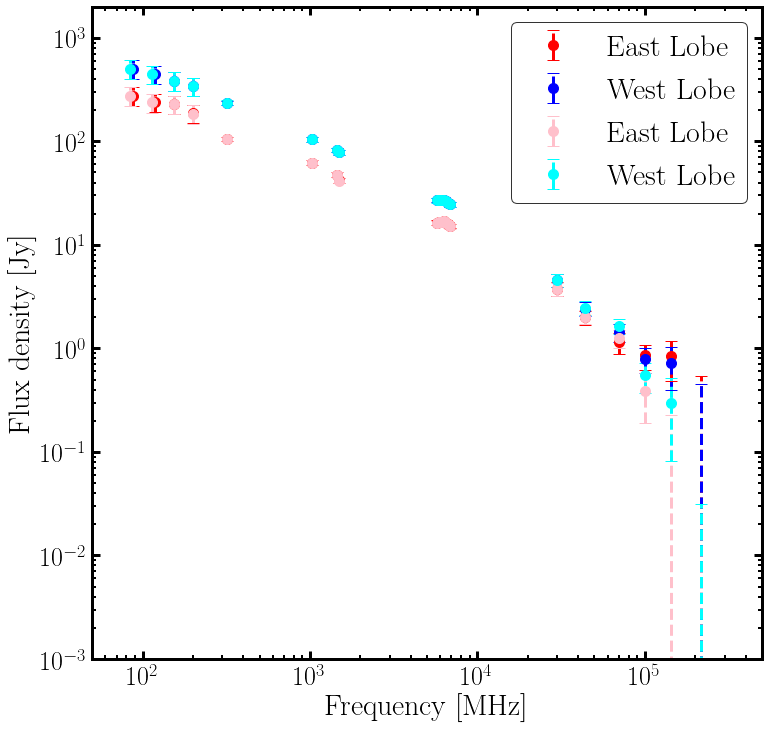

In [23]:
ToT= ascii.read(ToTDir+'ToTFluxes.tbl', fast_reader=False)
ELobe= ascii.read(ELobeDir+'ELFluxes.tbl', fast_reader=False)
WLobe= ascii.read(WLobeDir+'WLFluxes.tbl', fast_reader=False)

ToTcv= ascii.read(ToTDir+'ToTFluxes'+aut+'.tbl', fast_reader=False)
ELobecv= ascii.read(ELobeDir+'ELFluxes'+aut+'.tbl', fast_reader=False)
WLobecv= ascii.read(WLobeDir+'WLFluxes'+aut+'.tbl', fast_reader=False)

outplot=figDir+'SED_All_over'+aut+'.png'
plot_SED_over(ELobe,WLobe,ELobecv,WLobecv,outplot)

In [24]:
def plot_SED_literature(ToT,PeR,McK,sed):

    params = {'font.family'         :' serif',
              'font.style'          : 'normal',
              'font.weight'         : 'book',
              'font.size'           : 30.0,
              'axes.linewidth'      : 3,
              'lines.linewidth'     : 3,
              'xtick.labelsize'     : 26,
              'ytick.labelsize'     : 26, 
              'xtick.direction'     :'in',
              'ytick.direction'     :'in',
              'xtick.top'           : True,   # draw ticks on the top side
              'xtick.bottom'        : True,   # draw ticks on the bottom side    
              'ytick.left'          : True,   # draw ticks on the top side
              'ytick.right'         : True,   # draw ticks on the bottom side  
              'xtick.major.size'    : 8,
              'xtick.major.width'   : 3,
              'xtick.minor.size'    : 4,
              'xtick.minor.width'   : 2,
              'ytick.major.size'    : 8,
              'ytick.major.width'   : 3,
              'ytick.minor.size'    : 4,
              'ytick.minor.width'   : 2, 
              'text.usetex'         : True,
              'text.latex.unicode'  : True
               }
    plt.rcParams.update(params)

    # initialize figure
    fig = plt.figure(figsize =(12,12))
    fig.subplots_adjust(hspace=0.0)
    gs = gridspec.GridSpec(1, 1)
    plt.rc('xtick')


    # Initialize subplots
    ax1 = fig.add_subplot(gs[0])
    ax1.set_xlabel(r'Frequency [MHz]')
    ax1.set_ylabel(r'Flux density [Jy]')
    #ax1.set_xscale("symlog", nonposx='clip', linthreshy=0.1)
    #ax1.set_yscale("symlog", nonposy='clip', linthreshy=0.1)
    ax1.set_xscale("log", nonposx='clip')
    ax1.set_yscale("log", nonposy='clip')
    ax1.set_ylim([1e-3,2e3])
    ax1.set_xlim([50,5e5])
    ax1.tick_params(axis='both', which='major', pad=5)
    ax1.xaxis.set_minor_locator(LogLocator(base=10,subs=[2.0,4.0,6.0,8.0]))
    ax1.yaxis.set_minor_locator(LogLocator(base=10,subs=[2.0,4.0,6.0,8.0]))      
    # MODELS

    

    
    PeRPlot = ax1.errorbar(PeR['Frequency [MHz]'],PeR['Integrated Flux [Jy]'], yerr=PeR['Error [Jy]'],
             marker='o', color='green', linestyle='',label='Perley',capsize=6,markersize=12) 
    PeRPlot[-1][0].set_linestyle('--')
    PeRPlot[-1][0].set_linewidth(3)

    
    McKPlot = ax1.errorbar(McK['Frequency [MHz]'],McK['Integrated Flux [Jy]'], yerr=McK['Error [Jy]'],
             marker='o', color='cornflowerblue', linestyle='',label='McKinley',capsize=6,markersize=12) 
    McKPlot[-1][0].set_linestyle('--')
    McKPlot[-1][0].set_linewidth(3)

    ToTPlot = ax1.errorbar(ToT['Frequency [MHz]'][0:21],ToT['Integrated Flux [Jy]'][0:21], yerr=ToT['Error [Jy]'][0:21],
             marker='o', color='black', linestyle=' ',label='This work',capsize=6,markersize=12) 
    ToTPlot[-1][0].set_linestyle('--')
    ToTPlot[-1][0].set_linewidth(3)    
    
    legend = plt.legend(loc=1, prop={'size':20})
    legend.get_frame().set_edgecolor('black')

    # Save figure to file
    plt.savefig(sed,overwrite = True)
    
#-------------------------------------------------#
# Plot SED
#-------------------------------------------------#

def plotAllOverLit(tot,modCI,modCIOFF,modJP,modPW,per,perCI,perCIOFF,perJP,perPW,mck,mckCI,mckCIOFF,mckJP,mckPW,sed):

    params = {'font.family'         :' serif',
              'font.style'          : 'normal',
              'font.weight'         : 'book',
              'font.size'           : 30.0,
              'axes.linewidth'      : 3,
              'lines.linewidth'     : 3,
              'xtick.labelsize'     : 26,
              'ytick.labelsize'     : 26, 
              'xtick.direction'     :'in',
              'ytick.direction'     :'in',
              'xtick.top'           : True,   # draw ticks on the top side
              'xtick.bottom'        : True,   # draw ticks on the bottom side    
              'ytick.left'          : True,   # draw ticks on the top side
              'ytick.right'         : True,   # draw ticks on the bottom side  
              'xtick.major.size'    : 8,
              'xtick.major.width'   : 3,
              'xtick.minor.size'    : 4,
              'xtick.minor.width'   : 2,
              'ytick.major.size'    : 8,
              'ytick.major.width'   : 3,
              'ytick.minor.size'    : 4,
              'ytick.minor.width'   : 2, 
              'text.usetex'         : True,
              'text.latex.unicode'  : True
               }
    plt.rcParams.update(params)

    # initialize figure
    fig = plt.figure(figsize =(12,12))
    fig.subplots_adjust(hspace=0.0)
    gs = gridspec.GridSpec(1, 1)
    plt.rc('xtick')


    # Initialize subplots
    ax1 = fig.add_subplot(gs[0])
    ax1.set_xlabel(r'Frequency [MHz]')
    ax1.set_ylabel(r'Flux density [Jy]')
    #ax1.set_xscale("symlog", nonposx='clip', linthreshy=0.1)
    #ax1.set_yscale("symlog", nonposy='clip', linthreshy=0.1)
    ax1.set_xscale("log", nonposx='clip')
    ax1.set_yscale("log", nonposy='clip')
    ax1.set_ylim([1e-3,2e3])
    ax1.set_xlim([50,5e5])
    ax1.tick_params(axis='both', which='major', pad=5)
    
    # MODELS
    
    idx_max = (np.abs(modCI[0] - 5e5)).argmin()
    idx_min = (np.abs(modCI[0] - 30)).argmin()
    
    totplot1 = ax1.errorbar(tot['Frequency [MHz]'][0:21],tot['Integrated Flux [Jy]'][0:21], yerr=tot['Error [Jy]'][0:21],
             marker='o', color='black', linestyle=' ',label='Maccagni',capsize=6,markersize=20) 
    
    ax1.plot(modCI[0][idx_min:idx_max],modCI[1][idx_min:idx_max],lw=3, marker=' ', 
             color='black', linestyle=':',label='CI',alpha=0.5)
    ax1.plot(modCIOFF[0][idx_min:idx_max],modCIOFF[1][idx_min:idx_max],lw=3, marker=' ', 
             color='black', linestyle=':',label='CIOFF',alpha=0.5)
    ax1.plot(modJP[0][idx_min:idx_max],modJP[1][idx_min:idx_max],lw=3, marker=' ', 
             color='black', linestyle=':',label='JP',alpha=0.5)    
    #ax1.plot(modPW[0][idx_min:idx_max],modPW[1][idx_min:idx_max],lw=3, marker=' ', 
    #         color='black', linestyle=':',label='PW',alpha=0.5)      
    #idx_br = (np.abs(mod1[0] - float(stats1['break']))).argmin()
    #ax1.axvline(stats1['break'],ymin=0,ymax=0.58,ls=':',c='red',lw=3,alpha=0.8)
    
    totplot1[-1][0].set_linestyle('--')
    totplot1[-1][0].set_linewidth(3)    
    
    totplot2 = ax1.errorbar(per['Frequency [MHz]'],per['Integrated Flux [Jy]'], yerr=per['Error [Jy]'],
             marker='o', color='green', linestyle=' ',label='West Lobe',capsize=6,markersize=20) 
    
    idx_max = (np.abs(perCI[0] - 5e5)).argmin()
    idx_min = (np.abs(perCI[0] - 30)).argmin()    
    
    #ax1.plot(perCI[0][idx_min:idx_max],perCI[1][idx_min:idx_max],lw=3, marker=' ', 
    #         color='green', linestyle='-.',label=r'CI$_{Perley}$',alpha=0.5)
    #ax1.plot(perCIOFF[0][idx_min:idx_max],perCIOFF[1][idx_min:idx_max],lw=3, marker=' ', 
    #         color='green', linestyle='-.',label=r'CIOFF$_{Perley}$',alpha=0.5)
    #ax1.plot(perJP[0][idx_min:idx_max],perJP[1][idx_min:idx_max],lw=3, marker=' ', 
    #         color='green', linestyle='-.',label=r'JP$_{Perley}$',alpha=0.5)    
    #ax1.plot(perJP[0][idx_min:idx_max],perJP[1][idx_min:idx_max],lw=3, marker=' ', 
    #         color='green', linestyle='-.',label=r'PW$_{Perley}$',alpha=0.5)

    #idx_br = (np.abs(mod2[0] - float(stats2['break']))).argmin()
    #ax1.axvline(stats2['break'],ymin=0,ymax=0.58,ls=':',c='blue',lw=3,alpha=0.8)
    
    totplot2[-1][0].set_linestyle('--')
    totplot2[-1][0].set_linewidth(3)      
    
    totplot3 = ax1.errorbar(mck['Frequency [MHz]'],mck['Integrated Flux [Jy]'], yerr=mck['Error [Jy]'],
             marker='o', color='orange', linestyle=' ',label='Core',capsize=6,markersize=10) 
    
    idx_max = (np.abs(mckCI[0] - 5e5)).argmin()
    idx_min = (np.abs(mckCI[0] - 400)).argmin()    
    
    
    ax1.plot(mckCI[0][idx_min:idx_max],mckCI[1][idx_min:idx_max],lw=3, marker=' ', 
             color='darkorange', linestyle='--',label=r'CI$_{McKinley}$',alpha=0.5)
    ax1.plot(mckCIOFF[0][idx_min:idx_max],mckCIOFF[1][idx_min:idx_max],lw=3, marker=' ', 
             color='orange', linestyle='--',label=r'CIOFF$_{McKinley}$',alpha=0.5)
    ax1.plot(mckJP[0][idx_min:idx_max],mckJP[1][idx_min:idx_max],lw=3, marker=' ', 
             color='gold', linestyle='--',label=r'JP$_{McKinley}$',alpha=0.5)    
   # ax1.plot(mckPW[0][idx_min:idx_max],mckPW[1][idx_min:idx_max],lw=3, marker=' ', 
   #          color='yellow', linestyle='--',label=r'PW$_{McKinley}$',alpha=0.5)
    
    #idx_br = (np.abs(mod3[0] - float(stats3['break']))).argmin()
    #ax1.axvline(stats3['break'],ymin=0,ymax=0.58,ls=':',c='green',lw=3,alpha=0.8)
    
    totplot3[-1][0].set_linestyle('--')
    totplot3[-1][0].set_linewidth(3) 
    
    #ax1.axvline(br_f_no217,ymin=0,ymax=0.73,ls='-.',c='cyan',lw=1) 

    legend = plt.legend(loc=3, prop={'size': 20})
    legend.get_frame().set_edgecolor('black')

    # Save figure to file
    plt.savefig(sed,overwrite = True)


print '\n\t-----> Loaded <-----'


	-----> Loaded <-----


In [25]:
aut='FgBack'
PeR= ascii.read(inTabs+'PeRFluxes.tbl', fast_reader=False)
McK= ascii.read(inTabs+'McKFluxes.tbl', fast_reader=False)
ToT= ascii.read(ToTDir+'ToTFluxes'+aut+'.tbl', fast_reader=False)
print ToT
#ToTModCI = syn.readCIMod(ToTDir+'synOut/ToT'+aut+'CI_point1_fit.dat')
#ToTModCIOFF = syn.readCIMod(ToTDir+'synOut/ToT'+aut+'CIOFF_point1_fit.dat')
#ToTModJP = syn.readCIMod(ToTDir+'synOut/ToT'+aut+'JP_point1_fit.dat')
#ToTModPW = syn.readCIMod(ToTDir+'synOut/ToT'+aut+'PW_point1_fit.dat')

#PeRCI = syn.readCIMod(ToTDir+'synOut/PeRCI_point1_fit.dat')
#PeRCIOFF = syn.readCIMod(ToTDir+'synOut/PeRCIOFF_point1_fit.dat')
#PeRJP = syn.readCIMod(ToTDir+'synOut/PeRJP_point1_fit.dat')
#PeRPW = syn.readCIMod(ToTDir+'synOut/PeRPW_point1_fit.dat')

#McKCI = syn.readCIMod(ToTDir+'synOut/McKCI_point1_fit.dat')
#McKCIOFF = syn.readCIMod(ToTDir+'synOut/McKCIOFF_point1_fit.dat')
#McKJP = syn.readCIMod(ToTDir+'synOut/McKJP_point1_fit.dat')
#McKPW = syn.readCIMod(ToTDir+'synOut/McKPW_point1_fit.dat')

outplot=figDir+'SED_literature'+aut+'.png'
plot_SED_literature(ToT,PeR,McK,outplot)

outplot=figDir+'SED_litMod'+aut+'.png'

#plotAllOverLit(ToT,ToTModCI,ToTModCIOFF,ToTModJP,ToTModPW,PeR,PeRCI,PeRCIOFF,PeRJP,PeRPW,McK,McKCI,McKCIOFF,
#                McKJP,McKPW,outplot)



IOError: [Errno 2] No such file or directory: '/Users/maccagni/Projects/MFS/FornaxA/contData/inTabs/PeRFluxes.tbl'

In [ ]:
def plot_SED_literature_zoom(ToT,PeR,McK,sed):

    params = {'font.family'         :' serif',
              'font.style'          : 'normal',
              'font.weight'         : 'book',
              'font.size'           : 30.0,
              'axes.linewidth'      : 3,
              'lines.linewidth'     : 3,
              'xtick.labelsize'     : 26,
              'ytick.labelsize'     : 26, 
              'xtick.direction'     :'in',
              'ytick.direction'     :'in',
              'xtick.top'           : True,   # draw ticks on the top side
              'xtick.bottom'        : True,   # draw ticks on the bottom side    
              'ytick.left'          : True,   # draw ticks on the top side
              'ytick.right'         : True,   # draw ticks on the bottom side  
              'xtick.major.size'    : 8,
              'xtick.major.width'   : 3,
              'xtick.minor.size'    : 4,
              'xtick.minor.width'   : 2,
              'ytick.major.size'    : 8,
              'ytick.major.width'   : 3,
              'ytick.minor.size'    : 4,
              'ytick.minor.width'   : 2, 
              'text.usetex'         : True,
              'text.latex.unicode'  : True
               }
    plt.rcParams.update(params)

    # initialize figure
    fig = plt.figure(figsize =(12,12))
    fig.subplots_adjust(hspace=0.0)
    gs = gridspec.GridSpec(1, 1)
    plt.rc('xtick')


    # Initialize subplots
    ax1 = fig.add_subplot(gs[0])
    ax1.set_xlabel(r'Frequency [MHz]')
    ax1.set_ylabel(r'Flux density [Jy]')
    #ax1.set_xscale("symlog", nonposx='clip', linthreshy=0.1)
    #ax1.set_yscale("symlog", nonposy='clip', linthreshy=0.1)
    ax1.set_xscale("log", nonposx='clip')
    ax1.set_yscale("log", nonposy='clip')
    ax1.set_ylim([30,1e3])
    ax1.set_xlim([160,7.5e3])
    ax1.tick_params(axis='both', which='major', pad=5)
    ax1.xaxis.set_minor_locator(LogLocator(base=10,subs=[2.0,4.0,6.0,8.0]))
    ax1.yaxis.set_minor_locator(LogLocator(base=10,subs=[2.0,4.0,6.0,8.0]))    
    # MODELS

    

    
    PeRPlot = ax1.errorbar(PeR['Frequency [MHz]'],PeR['Integrated Flux [Jy]'], yerr=PeR['Error [Jy]'],
             marker='o', color='green', linestyle='',label='Perley',capsize=6,markersize=12) 
    PeRPlot[-1][0].set_linestyle('--')
    PeRPlot[-1][0].set_linewidth(3)

    
    McKPlot = ax1.errorbar(McK['Frequency [MHz]'],McK['Integrated Flux [Jy]'], yerr=McK['Error [Jy]'],
             marker='o', color='cornflowerblue', linestyle='',label='McKinley',capsize=6,markersize=12) 
    McKPlot[-1][0].set_linestyle('--')
    McKPlot[-1][0].set_linewidth(3)

    ToTPlot = ax1.errorbar(ToT['Frequency [MHz]'][0:21],ToT['Integrated Flux [Jy]'][0:21], yerr=ToT['Error [Jy]'][0:21],
             marker='o', color='black', linestyle=' ',label='This work',capsize=6,markersize=12) 
    ToTPlot[-1][0].set_linestyle('--')
    ToTPlot[-1][0].set_linewidth(3)    
    
    legend = plt.legend(loc=1, prop={'size':20})
    legend.get_frame().set_edgecolor('black')

    # Save figure to file
    plt.savefig(sed,overwrite = True)
    

In [ ]:
outplot=figDir+'SED_literature_zoom'+aut+'.png'
plot_SED_literature_zoom(ToT,PeR,McK,outplot)